In [1]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 19.5MB/s eta 0:00:01     |██████████████▍                 | 2.5MB 19.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests
from bs4 import BeautifulSoup

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## To Download the Neighborhood Data of New York from NYU Spatial Data University Link

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Calling the FourSquare API

In [11]:
CLIENT_ID = 'SJJUGCYWKZ5E4D2MKE0D20LHQTYY5DH04FYA4BC0UYHHE23J' # your Foursquare ID
CLIENT_SECRET = 'IJQTDAPTAP3E4S5JUOCITELROTXPHFBC1NAVMYAWCFK2G3Z3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SJJUGCYWKZ5E4D2MKE0D20LHQTYY5DH04FYA4BC0UYHHE23J
CLIENT_SECRET:IJQTDAPTAP3E4S5JUOCITELROTXPHFBC1NAVMYAWCFK2G3Z3


In [12]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Using Foursquare API, fetch the nearby venues to the available list of Neighbourhoods (within 500 meter range)

In [34]:
category = ['4d4b7105d754a06374d81259', '4d4b7104d754a06370d81259', '4d4b7105d754a06377d81259', '4d4b7105d754a06376d81259']

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [ ]:
#venues = results['response']['groups'][0]['items']
    
#nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
#filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
#nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#nearby_venues.head()

In [37]:
print(newyork_venues.shape)
newyork_venues.head()

(9972, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [31]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 432 uniques categories.


In [32]:
newyork_venues['Venue Category'].unique()

array(['Dessert Shop', 'Ice Cream Shop', 'Pharmacy', 'Donut Shop',
       'Gas Station', 'Sandwich Place', 'Deli / Bodega', 'Laundromat',
       'Pizza Place', 'Discount Store', 'Mattress Store', 'Bagel Shop',
       'Grocery Store', 'Fast Food Restaurant', 'Restaurant',
       'Baseball Field', 'Fried Chicken Joint', 'Park', 'Bus Station',
       'Caribbean Restaurant', 'Diner', 'Seafood Restaurant',
       'Bowling Alley', 'Bus Stop', 'Food & Drink Shop', 'Platform',
       'Metro Station', 'Juice Bar', 'Chinese Restaurant',
       'Cosmetics Shop', 'Plaza', 'High School', 'Bank',
       'Medical Supply Store', 'Food Truck', 'Home Service', 'Gym',
       'Gourmet Shop', 'Latin American Restaurant', 'Burger Joint', 'Pub',
       'Beer Bar', 'Warehouse Store', 'Spanish Restaurant', 'Coffee Shop',
       'Wings Joint', 'Mexican Restaurant', 'Bar', 'Bakery', 'Trail',
       'Supermarket', 'Candy Store', 'Rental Car Location',
       'Thrift / Vintage Store', 'Breakfast Spot', 'Café', 'Pe

In [33]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [38]:
newyork_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,28,28,28,28,28,28
Annadale,11,11,11,11,11,11
Arden Heights,5,5,5,5,5,5
Arlington,5,5,5,5,5,5
Arrochar,21,21,21,21,21,21
Arverne,18,18,18,18,18,18
Astoria,100,100,100,100,100,100
Astoria Heights,15,15,15,15,15,15
Auburndale,16,16,16,16,16,16


## To Fetch the Borough having highest number of Restaurants

In [39]:
df_rest = newyork_venues[newyork_venues['Venue Category'].str.contains("Restaurant")]
df_rest.shape
df_rest = df_rest.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
df_rest.shape
df_rest.groupby('Borough').count().sort_values(['Neighborhood'], ascending = False)
df_borough = df_rest.groupby('Borough').count().sort_values(['Neighborhood'], ascending = False)
df_borough = df_borough['Neighborhood']
df_borough

Borough
Manhattan        850
Brooklyn         623
Queens           595
Bronx            243
Staten Island    191
Name: Neighborhood, dtype: int64

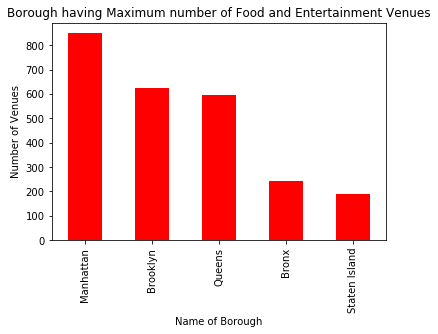

In [40]:
import matplotlib.pyplot as plt
df_borough.plot(kind='bar', color='red')
plt.title('Borough having Maximum number of Food and Entertainment Venues')
plt.xlabel('Name of Borough')
plt.ylabel('Number of Venues')
plt.show()

## To Fetch the Neighborhood inside a Borogh having highest number of Restaurants

In [65]:
df_manhattan = df_rest[df_rest['Borough'] == 'Manhattan']
df_manhattan
df_manhattan.groupby('Neighborhood').count().sort_values(['Venue Category'], ascending = False)
df_neighbourhood = df_manhattan.groupby('Neighborhood').count().sort_values(['Venue Category'], ascending = False)

df_neighbourhood

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Latitude,Longitude
Neighborhood,,,,,,,,,
Murray Hill,49,49,49,49,49,49,49,49,49
East Village,36,36,36,36,36,36,36,36,36
Chinatown,36,36,36,36,36,36,36,36,36
Greenwich Village,35,35,35,35,35,35,35,35,35
Turtle Bay,35,35,35,35,35,35,35,35,35
Noho,32,32,32,32,32,32,32,32,32
Upper West Side,30,30,30,30,30,30,30,30,30
Midtown South,29,29,29,29,29,29,29,29,29
Yorkville,29,29,29,29,29,29,29,29,29


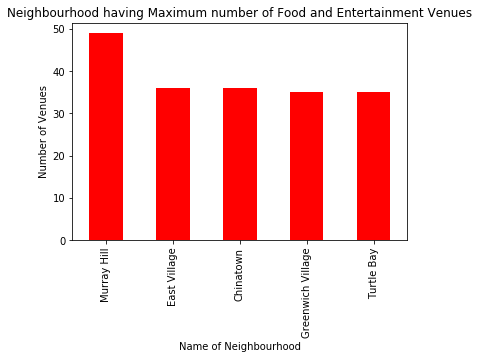

In [42]:
df_neighbourhood.plot(kind='bar', color='red')
plt.title('Neighbourhood having Maximum number of Food and Entertainment Venues')
plt.xlabel('Name of Neighbourhood')
plt.ylabel('Number of Venues')
plt.show()

In [43]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 432 uniques categories.


In [44]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant

In [45]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped.head()


,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant

In [46]:
num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0           Pizza Place  0.14
1         Deli / Bodega  0.07
2           Supermarket  0.07
3    Chinese Restaurant  0.07
4  Fast Food Restaurant  0.04


----Annadale----
           venue  freq
0    Pizza Place  0.45
1   Liquor Store  0.09
2          Diner  0.09
3         Bakery  0.09
4  Train Station  0.09


----Arden Heights----
           venue  freq
0       Pharmacy   0.2
1  Deli / Bodega   0.2
2    Pizza Place   0.2
3    Coffee Shop   0.2
4       Bus Stop   0.2


----Arlington----
                 venue  freq
0        Grocery Store   0.2
1        Deli / Bodega   0.2
2  American Restaurant   0.2
3          Coffee Shop   0.2
4             Bus Stop   0.2


----Arrochar----
                      venue  freq
0             Deli / Bodega  0.10
1        Italian Restaurant  0.10
2               Pizza Place  0.10
3                  Bus Stop  0.10
4  Mediterranean Restaurant  0.05


----Arverne----
             venue  freq
0        Surf Spot  0.22

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Supermarket,Deli / Bodega,Donut Shop,Spanish Restaurant,Fried Chicken Joint,Bus Station,Gas Station,Fast Food Restaurant
1,Annadale,Pizza Place,Restaurant,Train Station,Diner,Liquor Store,Sports Bar,Bakery,Ethiopian Restaurant,Event Service,Event Space
2,Arden Heights,Pizza Place,Pharmacy,Deli / Bodega,Bus Stop,Coffee Shop,Women's Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space
3,Arlington,American Restaurant,Deli / Bodega,Grocery Store,Bus Stop,Coffee Shop,Women's Store,Field,Ethiopian Restaurant,Event Service,Event Space
4,Arrochar,Italian Restaurant,Pizza Place,Deli / Bodega,Bus Stop,Athletics & Sports,Pharmacy,Liquor Store,Bagel Shop,Supermarket,Middle Eastern Restaurant


In [49]:
# set number of clusters
kclusters = 5

newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 1, 0, 3, 3, 0, 3, 0], dtype=int32)

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)




In [51]:
newyork_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
newyork_merged = newyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
newyork_merged = newyork_merged[newyork_merged['Cluster Labels'] != 0]
newyork_merged = newyork_merged.reset_index()
newyork_merged



,index,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Bronx,Fieldston,40.895437,-73.905643,3.0,Plaza,Cosmetics Shop,High School,Bus Station,Field,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit
1,4,Bronx,Riverdale,40.890834,-73.912585,4.0,Park,Bus Station,Food Truck,Plaza,Baseball Field,Medical Supply Store,Gym,Home Service,Bank,Fish Market
2,7,Bronx,Woodlawn,40.898273,-73.867315,1.0,Deli / Bodega,Pizza Place,Pub,Food Truck,Grocery Store,Park,Bar,Food & Drink Shop,Liquor Store,Donut Shop
3,9,Bronx,Williamsbridge,40.881039,-73.857446,3.0,Bar,Nightclub,Caribbean Restaurant,Soup Place,Women's Store,Field,Event Service,Event Space,Exhibit,Factory
4,12,Bronx,City Island,40.847247,-73.786488,3.0,Harbor / Marina,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,History Museum,Music Venue,Café,Smoke Shop,Boat or Ferry,Grocery Store
5,22,Bronx,Port Morris,40.801664,-73.913221,3.0,Latin American Restaurant,Furniture / Home Store,Cupcake Shop,Restaurant,Distillery,Peruvian Restaurant,Metro Station,Brewery,Donut Shop,Spanish Restaurant
6,27,Bronx,Clason Point,40.806551,-73.854144,4.0,Park,Recording Studio,Boat or Ferry,Grocery Store,Home Service,Bus Stop,Pool,South American Restaurant,Fish & Chips Shop,Falafel Restaurant
7,28,Bronx,Throgs Neck,40.815109,-73.816350,3.0,Coffee Shop,Italian Restaurant,Deli / Bodega,Pizza Place,Liquor Store,American Restaurant,Asian Restaurant,Sports Bar,Bar,Event Service
8,29,Bronx,Country Club,40.844246,-73.824099,3.0,Sandwich Place,Playground,Chinese Restaurant,Spa,Trail,Athletics & Sports,Farm,Empanada Restaurant,English Restaurant,Entertainment Service
9,32,Bronx,Van Nest,40.843608,-73.866299,1.0,Pizza Place,Deli / Bodega,Middle Eastern Restaurant,Bus Station,BBQ Joint,Coffee Shop,Hookah Bar,Board Shop,Donut Shop,Supermarket


In [53]:
newyork_merged = newyork_merged.drop([141])
newyork_merged = newyork_merged.reset_index()
newyork_merged.head()

,level_0,index,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,3,Bronx,Fieldston,40.895437,-73.905643,3.0,Plaza,Cosmetics Shop,High School,Bus Station,Field,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit
1,1,4,Bronx,Riverdale,40.890834,-73.912585,4.0,Park,Bus Station,Food Truck,Plaza,Baseball Field,Medical Supply Store,Gym,Home Service,Bank,Fish Market
2,2,7,Bronx,Woodlawn,40.898273,-73.867315,1.0,Deli / Bodega,Pizza Place,Pub,Food Truck,Grocery Store,Park,Bar,Food & Drink Shop,Liquor Store,Donut Shop
3,3,9,Bronx,Williamsbridge,40.881039,-73.857446,3.0,Bar,Nightclub,Caribbean Restaurant,Soup Place,Women's Store,Field,Event Service,Event Space,Exhibit,Factory
4,4,12,Bronx,City Island,40.847247,-73.786488,3.0,Harbor / Marina,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,History Museum,Music Venue,Café,Smoke Shop,Boat or Ferry,Grocery Store


In [54]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
newyork_merged.loc[newyork_merged['Cluster Labels'] == 3, newyork_merged.columns[[2] + list(range(5, newyork_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,-73.905643,3.0,Plaza,Cosmetics Shop,High School,Bus Station,Field,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit
3,Bronx,-73.857446,3.0,Bar,Nightclub,Caribbean Restaurant,Soup Place,Women's Store,Field,Event Service,Event Space,Exhibit,Factory
4,Bronx,-73.786488,3.0,Harbor / Marina,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,History Museum,Music Venue,Café,Smoke Shop,Boat or Ferry,Grocery Store
5,Bronx,-73.913221,3.0,Latin American Restaurant,Furniture / Home Store,Cupcake Shop,Restaurant,Distillery,Peruvian Restaurant,Metro Station,Brewery,Donut Shop,Spanish Restaurant
7,Bronx,-73.816350,3.0,Coffee Shop,Italian Restaurant,Deli / Bodega,Pizza Place,Liquor Store,American Restaurant,Asian Restaurant,Sports Bar,Bar,Event Service
8,Bronx,-73.824099,3.0,Sandwich Place,Playground,Chinese Restaurant,Spa,Trail,Athletics & Sports,Farm,Empanada Restaurant,English Restaurant,Entertainment Service
11,Brooklyn,-74.030621,3.0,Spa,Italian Restaurant,Pizza Place,American Restaurant,Greek Restaurant,Bar,Ice Cream Shop,Pharmacy,Hookah Bar,Chinese Restaurant
12,Brooklyn,-73.995180,3.0,Chinese Restaurant,Italian Restaurant,Ice Cream Shop,Dessert Shop,Sushi Restaurant,Donut Shop,Pharmacy,Supermarket,Grocery Store,Cha Chaan Teng
13,Brooklyn,-73.954241,3.0,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Sushi Restaurant,French Restaurant,Café,Yoga Studio,Grocery Store,Restaurant
14,Brooklyn,-73.965094,3.0,Russian Restaurant,Eastern European Restaurant,Restaurant,Beach,Mobile Phone Shop,Bank,Sushi Restaurant,Gourmet Shop,Mediterranean Restaurant,Bakery


In [64]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters